# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ismi Nilam Anggraini
- **Email:** isminilamng@gmail.com
- **ID Dicoding:** isminilam

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca dan suhu terhadap jumlah penyewaan sepeda?
- Bagaimana distribusi jumlah penyewaan per jam dalam sehari pada hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Terdapat dua dataset yang digunakan, yaitu:

- day_df: Data penyewaan sepeda dalam unit harian.
- hour_df: Data penyewaan sepeda dalam unit per jam.

### Assessing Data

#### Menilai dataset day.csv

In [7]:
# Menampilkan informasi dataset day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Memeriksa missing values pada dataset day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
# Memeriksa duplikasi data pada dataset day
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai dataset hour.csv

In [10]:
# Menampilkan informasi dataset hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Memeriksa missing values pada dataset hour
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
# Memeriksa duplikasi data pada dataset hour
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada kedua dataset tidak ada duplikasi atau missing value.
- Terdapat kesalahan pada kolom dteday bertipe object, seharusnya dikonversi menjadi datetime untuk analisis berbasis waktu.

### Cleaning Data

In [13]:
# Mengonversi kolom 'dteday' ke dalam format datetime untuk memastikan tipe data sesuai
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Menampilkan informasi dataset setelah konversi
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
# Mengonversi kolom 'dteday' ke dalam format datetime untuk memastikan tipe data sesuai
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Menampilkan informasi dataset setelah konversi
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengubah tipe data pada kedua dataset day dan hour pada kolom dteday dari object menjadi datetime.

In [15]:
# Mengubah nilai numerik pada kolom 'weathersit' menjadi label kategori cuaca
weather_mapping = {
    1: "Cerah",
    2: "Mendung",
    3: "Hujan Ringan",
    4: "Hujan Lebat/Salju"
}

day_df["weathersit"] = day_df["weathersit"].map(weather_mapping)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Mengubah nilai numerik pada kolom weathersit dataset day_df menjadi 4 label kategori cuaca yaitu cerah, mendung, hujan ringan, dan hujan lebat/salju agar lebih mudah untuk dibaca dan dipahami

## Exploratory Data Analysis (EDA)

### Explore Day

In [16]:
# Mengelompokkan data rata-rata, jumlah, min, dan max pada penyewaan sepeda berdasarkan kondisi cuaca dan temperatur
day_df.groupby("weathersit").agg({
    "cnt": ["mean", "sum", "min", "max"],
    "temp": "mean"
})

cnt                          temp
                     mean      sum  min   max      mean
weathersit                                             
Cerah         4876.786177  2257952  431  8714  0.511541
Hujan Ringan  1803.285714    37869   22  4639  0.433440
Mendung       4035.862348   996858  605  8362  0.470366

In [26]:
# Mendapatkan baris dengan penyewaan minimum dan maksimum
min_row = day_df.loc[day_df["cnt"].idxmin()]
max_row = day_df.loc[day_df["cnt"].idxmax()]

# Menyimpan nilai penyewaan dan kondisi cuaca
min_cnt, min_weather = min_row["cnt"], min_row["weathersit"]
max_cnt, max_weather = max_row["cnt"], max_row["weathersit"]

# Menampilkan hasil
print(f"Jumlah penyewaan sepeda minimum: {min_cnt}, pada cuaca {min_weather}")
print(f"Jumlah penyewaan sepeda maksimum: {max_cnt}, pada cuaca {max_weather}")


Jumlah penyewaan sepeda minimum: 22, pada cuaca Hujan Ringan
Jumlah penyewaan sepeda maksimum: 8714, pada cuaca Cerah


In [18]:
# Mengkategorikan suhu menjadi 5, yaitu ver cold, cold, mild, warm, dan hot
day_df['temp_category'] = pd.cut(day_df['temp'], bins=5, labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])

# Mengelompokkan data rata-rata, jumlah, min, dan max pada penyewaan sepeda berdasarkan kategori suhu
day_df.groupby("temp_category", observed=False).agg({
    "cnt": ["mean", "sum", "min", "max"]
})

cnt                     
                      mean      sum   min   max
temp_category                                  
Very Cold      1571.162791    67560   431  3292
Cold           3152.015464   611491   441  5992
Mild           4585.797688   793343    22  8090
Warm           5674.958763  1100942  1115  8714
Hot            5664.118110   719343  3285  8173

**Insight:**
- Berdasarkan analisis dataset day, jumlah penyewaan sepeda terbanyak saat kondisi cuaca cerah dan sedikit saat cuaca hujan ringan.
- Jumlah penyewaan sepeda terbanyak pada temperatur warm dan sedikit saat very cold.

Explore hour

In [19]:
# Menambahkan kategori hari kerja dan akhir pekan berdasarkan kolom "weekday"
hour_df["day_type"] = hour_df["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

In [20]:
# Mengelompokkan jumlah penyewaan sepeda berdasarkan jam dan jenis hari (weekday atau weekeend)
hour_df.groupby(["hr", "day_type"]).agg(
    total_rentals=("cnt", "sum")
)

total_rentals
hr day_type               
0  Weekday           23775
   Weekend           15355
1  Weekday           14476
   Weekend            9688
2  Weekday            9725
   Weekend            6627
3  Weekday            5098
   Weekend            3076
4  Weekday            3035
   Weekend            1393
5  Weekday           10921
   Weekend            3340
6  Weekday           43564
   Weekend           11568
7  Weekday          122895
   Weekend           31276
8  Weekday          200904
   Weekend           60097
9  Weekday          112890
   Weekend           46548
10 Weekday           82162
   Weekend           44095
11 Weekday           97252
   Weekend           54068
12 Weekday          120284
   Weekend           64130
13 Weekday          119342
   Weekend           65577
14 Weekday          111758
   Weekend           63894
15 Weekday          116738
   Weekend           66411
16 Weekday          154880
   Weekend           72868
17 Weekday          250536
   Weekend           86324
18 Weekday          235616
   Weekend           74156
19 Weekday          170421
   Weekend           56368
20 Weekday          123554
   Weekend           40996
21 Weekday           91554
   Weekend           33891
22 Weekday           65792
   Weekend           29820
23 Weekday           39910
   Weekend           24031

In [30]:
# Jumlah penyewaan sepeda pada weekday dan weekend
print("Jam dengan penyewaan tertinggi pada hari kerja:")
print(hour_df.groupby(["hr", "day_type"]).agg(total_rentals=('cnt', 'sum')).query("day_type == 'Weekday'").nlargest(1, "total_rentals"))

print("\nJam dengan penyewaan terendah pada hari kerja:")
print(hour_df.groupby(["hr", "day_type"]).agg(total_rentals=('cnt', 'sum')).query("day_type == 'Weekday'").nsmallest(1, "total_rentals"))

print("\nJam dengan penyewaan tertinggi pada akhir pekan:")
print(hour_df.groupby(["hr", "day_type"]).agg(total_rentals=('cnt', 'sum')).query("day_type == 'Weekend'").nlargest(1, "total_rentals"))

print("\nJam dengan penyewaan terendah pada akhir pekan:")
print(hour_df.groupby(["hr", "day_type"]).agg(total_rentals=('cnt', 'sum')).query("day_type == 'Weekend'").nsmallest(1, "total_rentals"))


Jam dengan penyewaan tertinggi pada hari kerja:
             total_rentals
hr day_type               
17 Weekday          250536

Jam dengan penyewaan terendah pada hari kerja:
             total_rentals
hr day_type               
4  Weekday            3035

Jam dengan penyewaan tertinggi pada akhir pekan:
             total_rentals
hr day_type               
17 Weekend           86324

Jam dengan penyewaan terendah pada akhir pekan:
             total_rentals
hr day_type               
4  Weekend            1393


**Insight:**
- Pada weekend dan weekday, penyewaan tertinggi yaitu jam 17 dan terendah pada jam 4.

## Visualization & Explanatory Analysis

### Pertanyaan 1: - Bagaimana pengaruh cuaca dan suhu terhadap jumlah penyewaan sepeda?

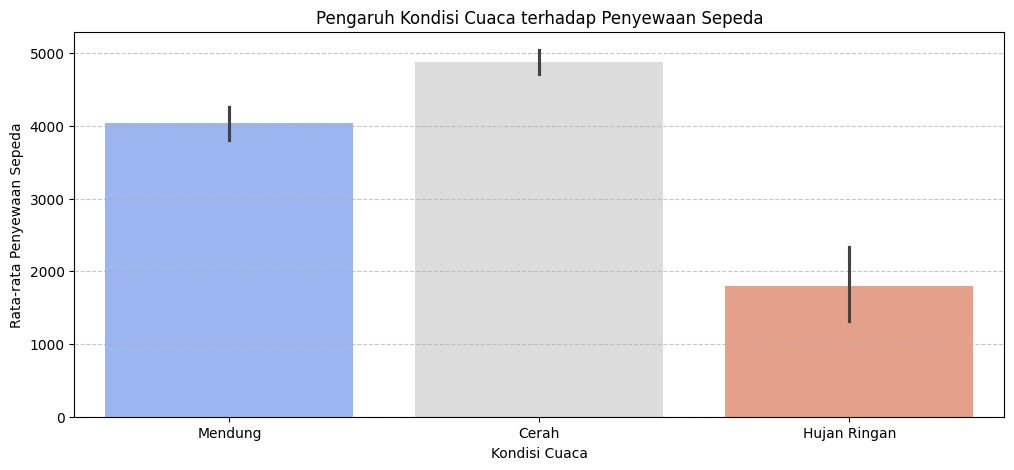

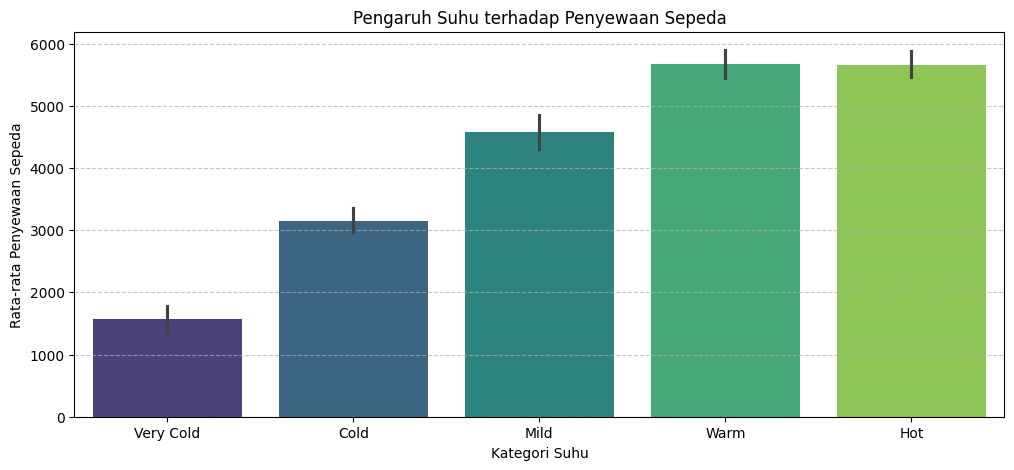

In [22]:
# Visualisasi jumlah penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(12, 5))
sns.barplot(data=day_df, x="weathersit", y="cnt", estimator=np.mean, hue="weathersit", palette="coolwarm", legend=False)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Visualisasi jumlah penyewaan sepeda berdasarkan kategori suhu
plt.figure(figsize=(12, 5))
sns.barplot(data=day_df, x="temp_category", y="cnt", estimator=np.mean, hue="temp_category", palette="viridis", legend=False)
plt.xlabel("Kategori Suhu")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pengaruh Suhu terhadap Penyewaan Sepeda")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()


**Insight:**
- Berdasarkan grafik pertama, terlihat bahwa kondisi cuaca mempengaruhi rata-rata penyewaan sepeda secara signifikan. Penyewaan sepeda meningkat pada saat kondisi cuaca cerah dan menurun pada kondisi cuaca hujan ringan.
- Berdasarkan grafik kedua, menunjukkan bahwa suhu juga memiliki dampak terhadap penyewaan sepeda. Rata-rata, orang-orang akan memilih pada saat temperatur udara hangat dan panas.

### Pertanyaan 2: Bagaimana distribusi jumlah penyewaan per jam dalam sehari pada hari kerja dibandingkan akhir pekan?

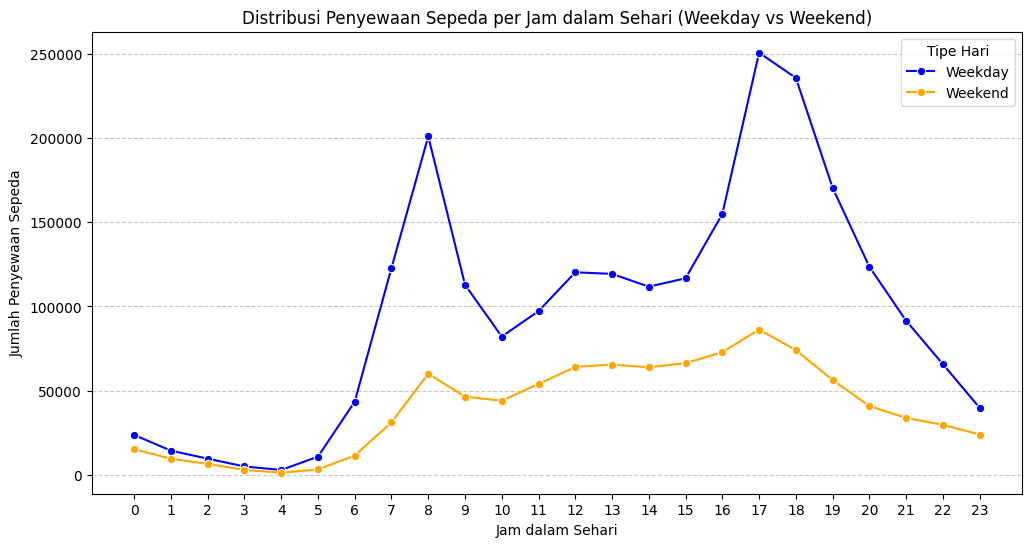

In [23]:
# Mengelompokkan data penyewaan sepeda berdasarkan jam dan tipe hari
hourly_rentals = hour_df.groupby(["hr", "day_type"]).agg(total_rentals=('cnt', 'sum')).reset_index()

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x="hr", y="total_rentals", hue="day_type", marker="o", palette=["blue", "orange"])

# Pengaturan plot
plt.xticks(ticks=range(0, 24))  # Menyesuaikan sumbu x dari 0 hingga 23
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda per Jam dalam Sehari (Weekday vs Weekend)")
plt.legend(title="Tipe Hari")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()


**Insight:**
- Saat weekday (hari kerja), penyewaan sepeda meningkat pada pagi hari (sekitar pukul 7-9) dan sore hari (sekitar pukul 17-19), dan menurun secara bertahap pada malam hari yang menunjukkan bahwa banyak orang menggunakan sepeda untuk perjalanan ke dan dari tempat kerja/sekolah.
- Saat weekend (hari libur), pola penyewaan lebih merata sepanjang hari, tanpa lonjakan signifikan di pagi atau sore hari. Penyewaan sepeda mulai meningkat dari pagi hingga mencapai puncaknya pada siang hingga sore hari (sekitar pukul 11-17). Hal ini menunjukkan bahwa orang lebih banyak menggunakan sepeda untuk rekreasi atau aktivitas santai

## Conclusion

1. Bagaimana pengaruh cuaca dan suhu terhadap jumlah penyewaan sepeda?
2. Bagaimana distribusi jumlah penyewaan per jam dalam sehari pada hari kerja dan akhir pekan?

**Conclution pertanyaan 1:**

Suhu dan cuaca yang buruk sangat **menurunkan** minat penyewaan sepeda karena cuaca dan suhu yang buruk membuat tidak nyaman bagi pengguna sepeda. Namun, cuaca yang baik dan suhu yang nyaman akan **meningkatkan** minat orang untuk menggunakan sepeda. Dapat dimanfaatkan untuk strategi pemasaran, misalnya dengan memberikan diskon pada saat cuaca mendukung.

**Conclution pertanyaan 2:**
Weekday yaitu **pola dua puncak** yang menunjukkan penggunaan sepeda sebagai transportasi utama saat jam kerja.
Weekend yaitu **pola lebih merata** sehingga mengindikasikan bahwa penggunaan sepeda lebih ke arah rekreasi atau aktivitas santai.

###Menggabungkan day_df dan hour_df menjadi file main_data.csv

In [24]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)

# Simpan ke file CSV
all_df.to_csv("main_data.csv", index=False)